In [27]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import random
import cv2
from PIL import Image
from nltk.corpus import stopwords
from scipy.misc import imread
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS

In [2]:
data = pd.read_csv('data/lyrics.csv')
data.drop(['index'], axis=1, inplace=True)
data.head()

,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 5 columns):
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ MB


# Time of Songs

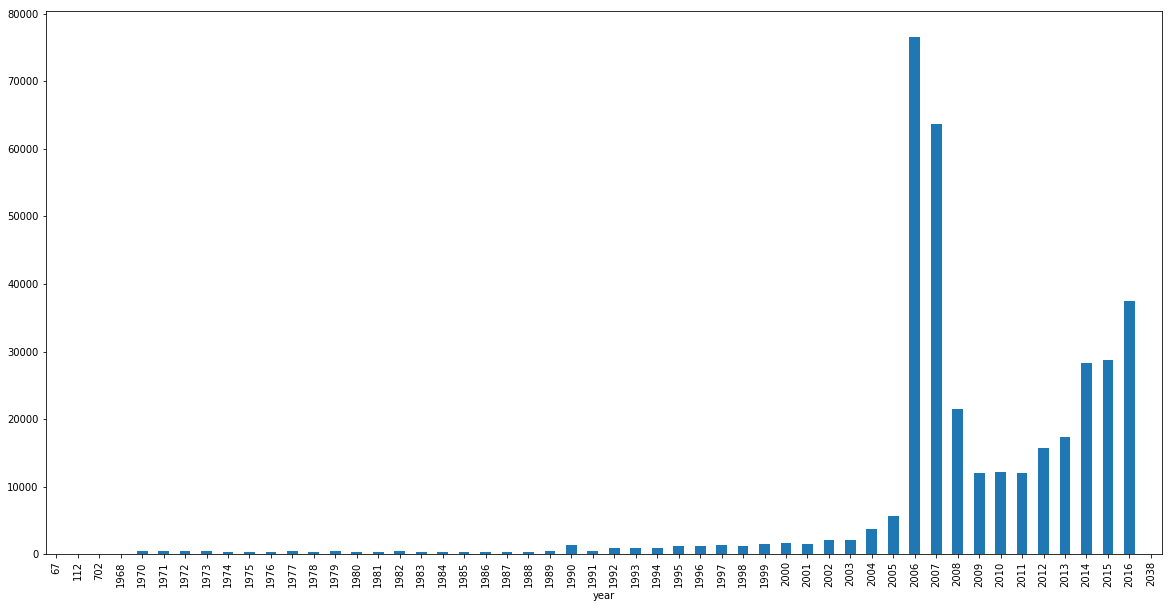

In [4]:
data.groupby(['year']).aggregate({
    'year' : 'count'
})['year'].plot.bar(figsize=(20,10))
plt.show()

In [5]:
def times(c):
    if 1950 <= c and c < 1960:
        return 1950
    elif 1960 <= c and c < 1970:
        return 1960
    if 1970 <= c and c < 1980:
        return 1970
    elif 1980 <= c and c < 1990:
        return 1980
    elif 1990 <= c and c < 2000:
        return 1990
    elif 2000 <= c and c < 2010:
        return 2000
    elif 2010 <= c and c < 2020:
        return 2010
    
    # -1 indicates an unreasonable time
    return -1

data['year'] = data['year'].apply(int, 1)
data['times'] = data['year'].apply(times)
data.head()

,song,year,artist,genre,lyrics,times
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",2000
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",2000
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,2000
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",2000
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",2000


In [6]:
#data.drop(data['times']==-1, inplace=True)

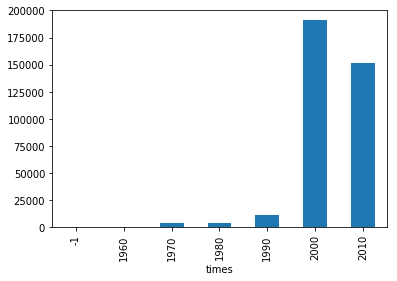

In [7]:
data.groupby(['times']).aggregate({
    'times' : 'count'
}).sort_index(ascending=True)['times'].plot.bar()
plt.show()

# Genres

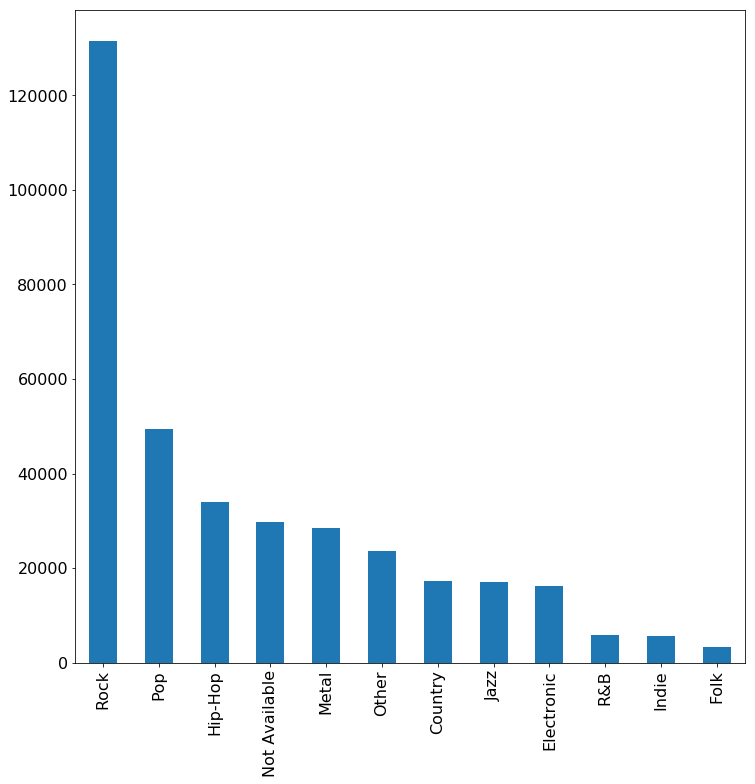

In [22]:
genreCount = data['genre'].value_counts()
genreCount.plot.bar( figsize=(12, 12), fontsize=16)
plt.show()

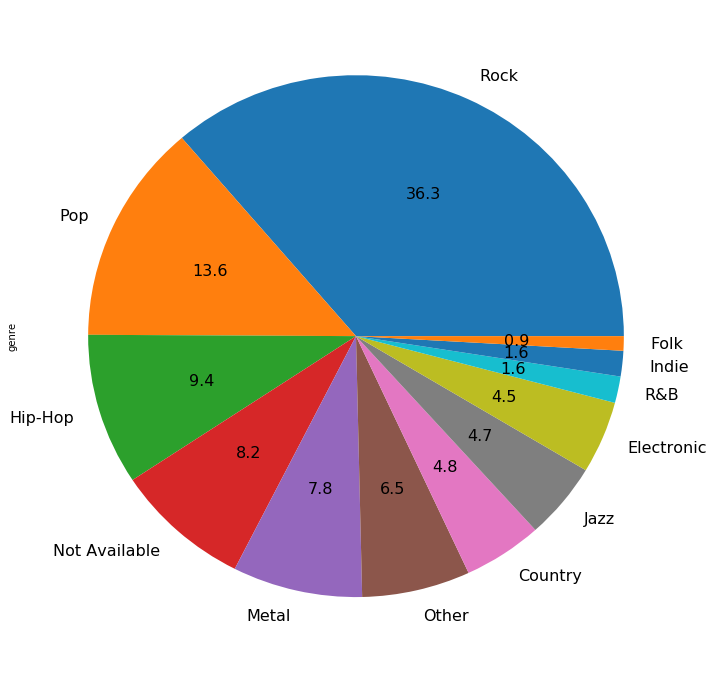

In [23]:
genreCount.plot.pie( figsize=(12, 12), fontsize=16 , autopct='%.1f' )
plt.show()

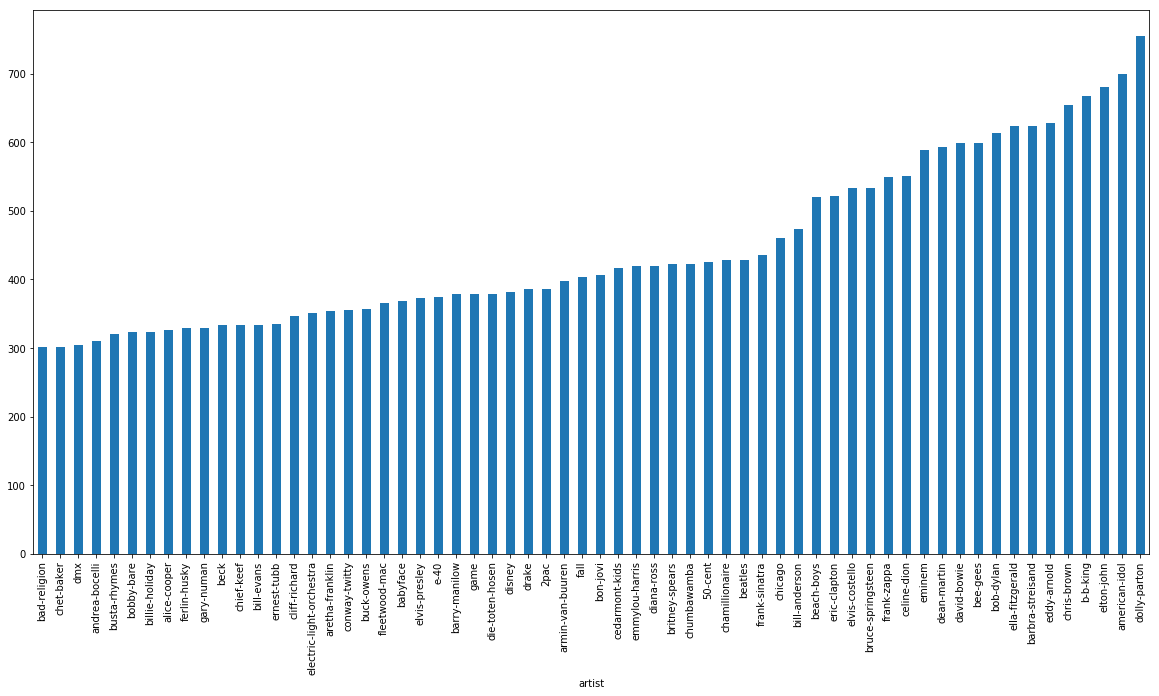

In [9]:
df_artist = data.groupby(['artist']).aggregate({
    'artist' : ['count']
})
df_artist = df_artist.sort_values([('artist','count')])

df_artist[df_artist[('artist','count')] >= 300][('artist','count')].plot.bar(figsize=(20,10))
plt.show()

In [10]:
data.pivot_table(
    values=['year'], 
    index=['genre'], 
    columns=['times'], 
    aggfunc='count', 
    fill_value=0
)

year                                      
times         -1     1960  1970  1980  1990   2000   2010
genre                                                    
Country           0     0   157    73   539  11552   4965
Electronic        0     0    39    90   435   5176  10465
Folk              0     0    10    13   138   1616   1464
Hip-Hop           5     0    10   113   637  15375  17825
Indie             0     0     0     0    25   1459   4248
Jazz              0     0   608   387  1189   5324   9639
Metal             0     0     0   182   482  20161   7583
Not Available     0     0   267   172   828  15435  13112
Other             0     0   762   504   893   1469  20055
Pop               1     0   371   400  1228  25697  21747
R&B               0     0   134   342   296   2094   3069
Rock             10     1  2138  1598  4595  85489  37546

# Word Counts

In [11]:
data = data.replace({'\n': ' '}, regex=True)
data.head()

,song,year,artist,genre,lyrics,times
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",2000
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...",2000
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,2000
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...",2000
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",2000


In [12]:
data['word_count'] = data['lyrics'].str.split().str.len()

In [13]:
data.head()

,song,year,artist,genre,lyrics,times,word_count
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",2000,433.0
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...",2000,258.0
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,2000,170.0
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...",2000,522.0
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",2000,312.0


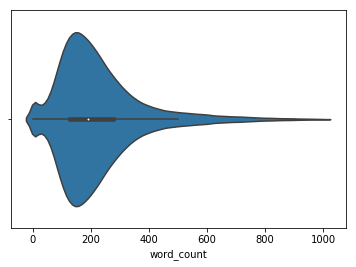

In [14]:
# remove outliers for a better plot
data_no_outliers = data[data['word_count'] <= 1000]
sns.violinplot(x=data_no_outliers['word_count'])
plt.show()

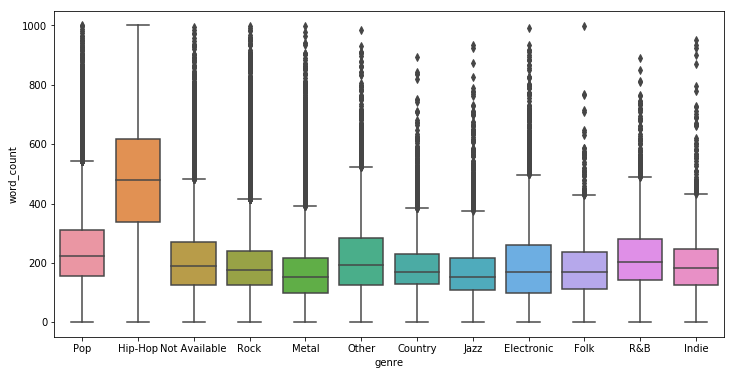

In [15]:
mpl.rc("figure", figsize=(12, 6))
sns.boxplot(x="genre", y="word_count", data=data_no_outliers)
plt.show()

# Word Clouds

In [51]:
# words to remove from the word cloud
english_stopwords = set(
    stopwords.words('english')) | \
    STOPWORDS | \
    ENGLISH_STOP_WORDS | \
    set([
        'ya', 'aah', 'ye', 'hey', 'ba',
        'da', 'buh', 'duh', 'doo', 'oh',
        'ooh', 'woo', 'uh', 'hoo', 'ah',
        'yeah', 'oo', 'la', 'chorus', 'beep',
        'ha'
    ])

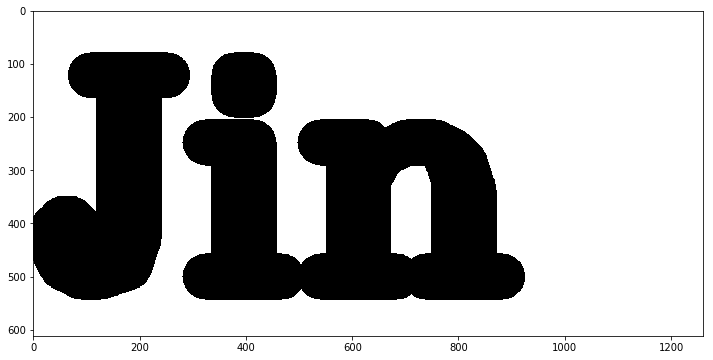

In [53]:
def imageArtist(name):# Create a black image
    """
    Create a blank image showing the name of the input.
    
    :param name: name of the artist
    :type  name: str
    :returns: Numpy array of shape (height, width, channels) to represent an image
    :rtype:   numpy.ndarray
    """
    
    cnt = len(name)
    img = np.zeros((612,cnt*420,3), np.uint8)
    
    # Write some Text
    font = cv2.FONT_HERSHEY_TRIPLEX
    cv2.putText(img,name,(0,500), font, 18,(255,255,255),85)
    img = 255-img
    
    #Save image
    cv2.imwrite("Out_Name/out.jpg", img)
    return img

# example
plt.imshow(imageArtist('Jin'))
plt.show()

In [56]:
def drawCloud(s):
    """
    Generate a word cloud using the lyrics.
    
    :param s: string of the lyrics
    :type  s: str
    """
    
    img = Image.open("Out_Name/out.jpg")
    hcmask = np.array(img)
    wordcloud = WordCloud(
        background_color="white",
        max_words=150,
        stopwords=english_stopwords,
        mask=hcmask,
        #background_color='#000000',
        #font_path='#fafafa'
    ).generate(s)
    
    fig = plt.figure()
    fig.set_figwidth(27)
    fig.set_figheight(20)
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.figure()
    #plt.imshow(hcmask, cmap=plt.cm.gray)
    #plt.axis("off")
    plt.show()

In [40]:
def ofString(s):
    s = s.lower()
    s = s.replace('\n',' ')
    s = s.replace(',',' ')
    return s

def allTextByArtist(df):
    """
    Create a dictionary mapping artists to their lyrics.
    
    :param df: Dataframe of the music csv file
    :type  df: pandas.core.frame.DataFrame
    :returns: dictionary where the key is the artist 
              and the value is all the lyrics combined into one string
    :rtype:   dict
    """
    
    D={}
    for ind,val in df.iterrows():
        art = val["artist"]
        if art in D:
            D[art]= D[art]+ ofString(str(val["lyrics"]))
        else:
            D[art]= ofString(str(val["lyrics"]))
    return D

D = allTextByArtist(data)

pandas.core.frame.DataFrame

In [58]:
def drawCloudArtist(name):
    """
    Draw word cloud of an artist.
    
    :param name: name of the artist
    :type  name: str
    """
    
    imageArtist(name)
    name  = name.lower()
    name = name.replace(' ','-')
    drawCloud(D[name])

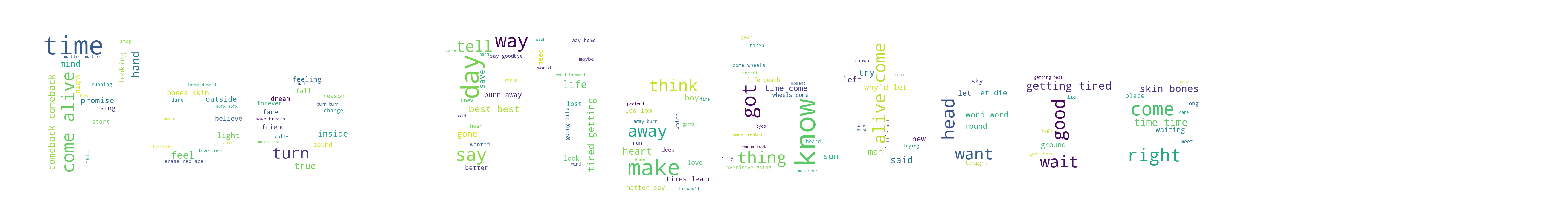

In [59]:
drawCloudArtist('Foo Fighters')

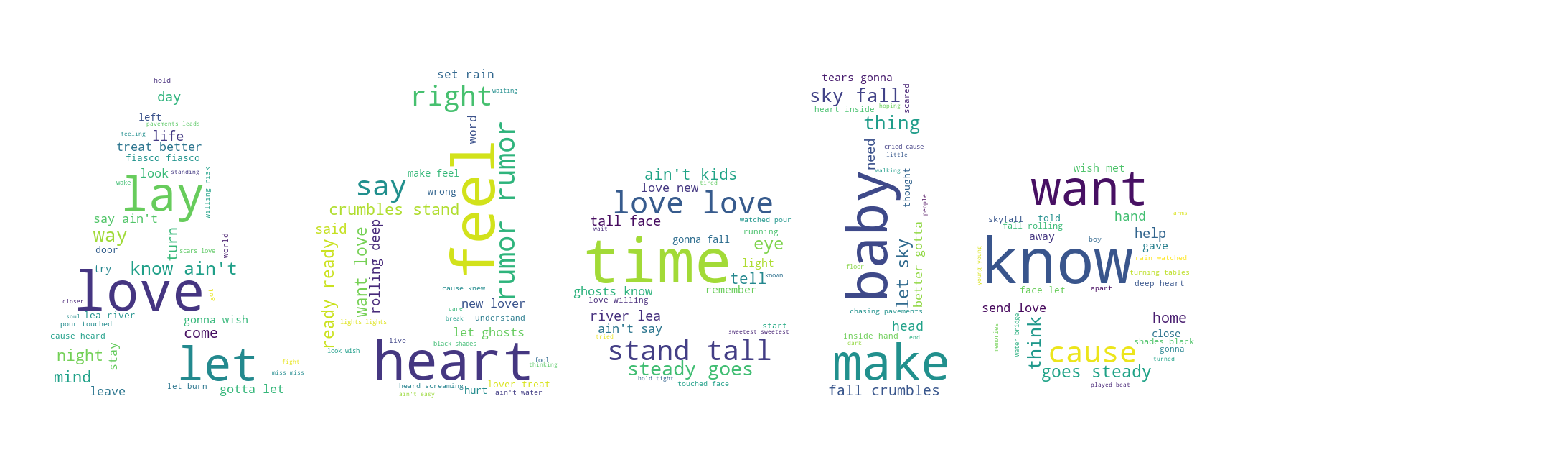

In [60]:
drawCloudArtist('Adele')

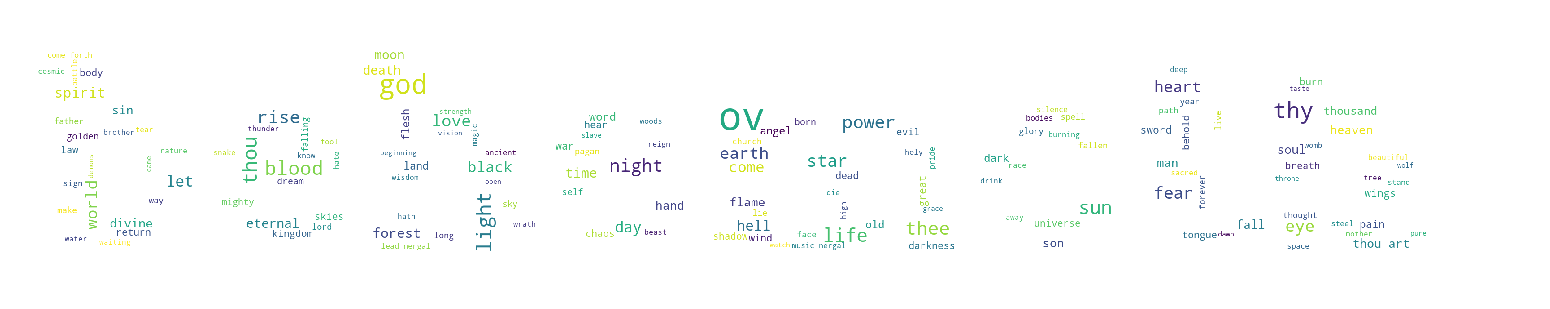

In [64]:
drawCloudArtist('behemoth')

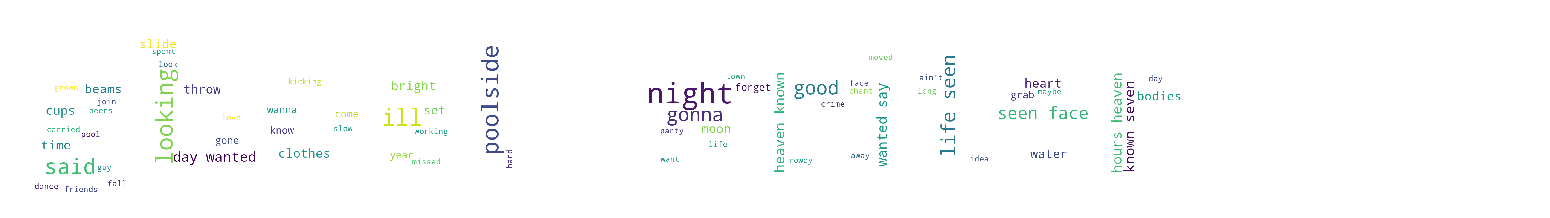

In [66]:
drawCloudArtist('ghost writer')

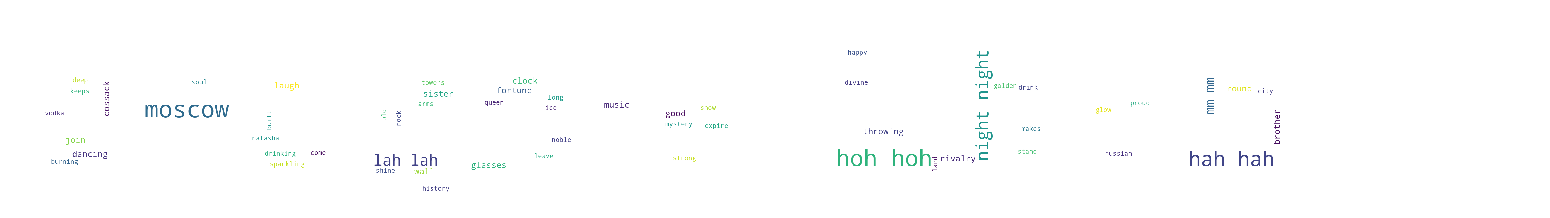

In [70]:
drawCloudArtist('genghis khan')

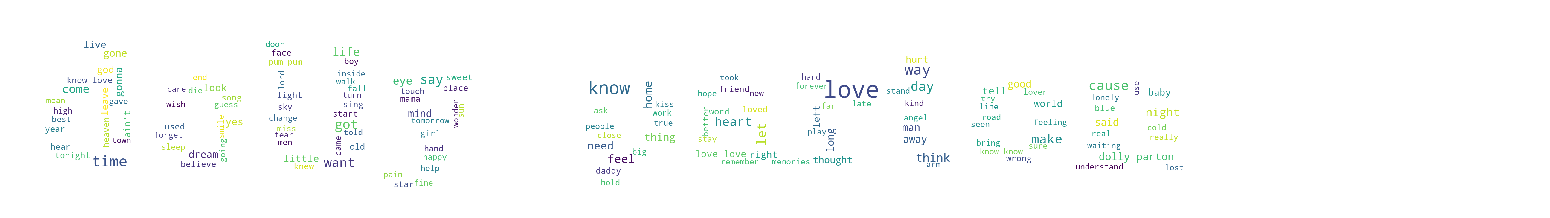

In [72]:
drawCloudArtist('dolly parton')

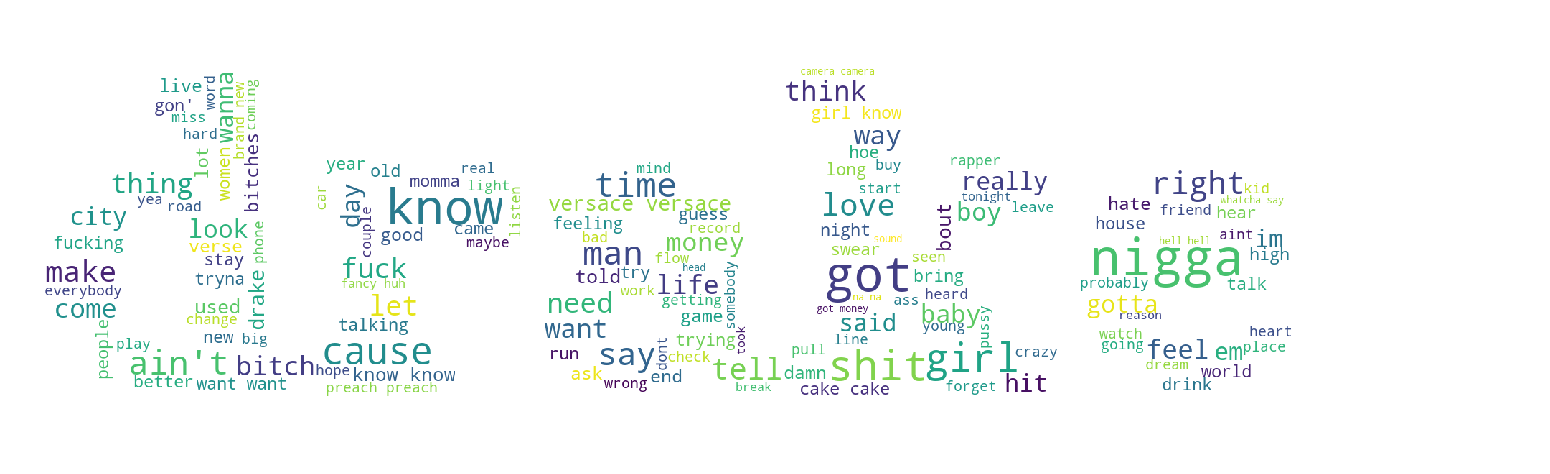

In [73]:
drawCloudArtist('drake')

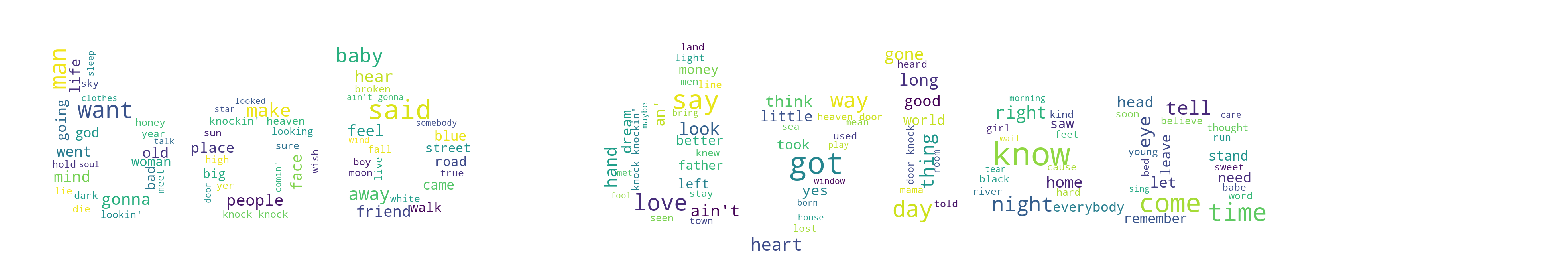

In [78]:
drawCloudArtist('bob dylan')

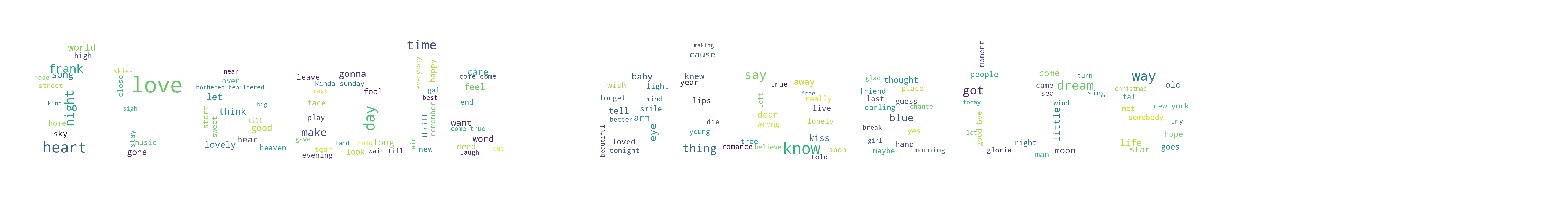

In [79]:
drawCloudArtist('frank sinatra')

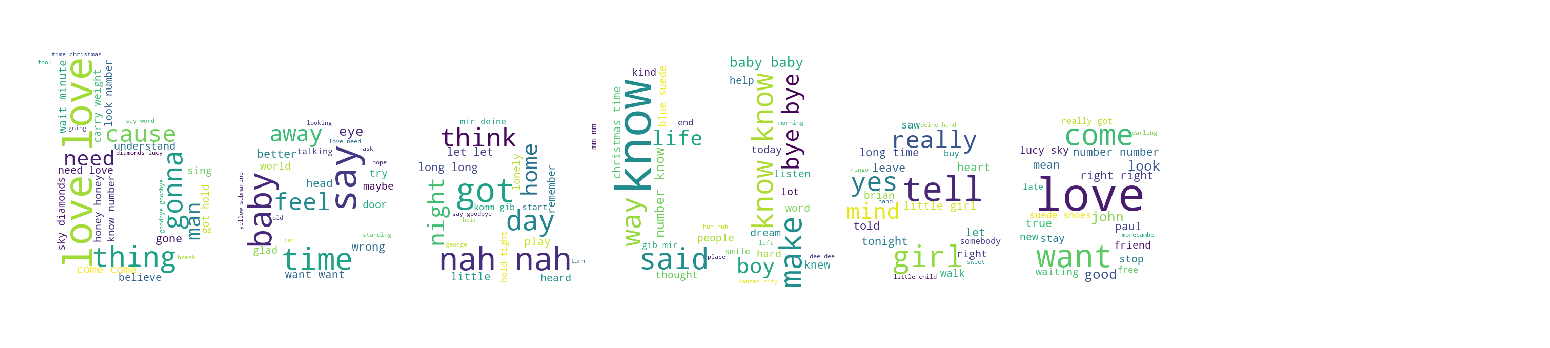

In [80]:
drawCloudArtist('beatles')

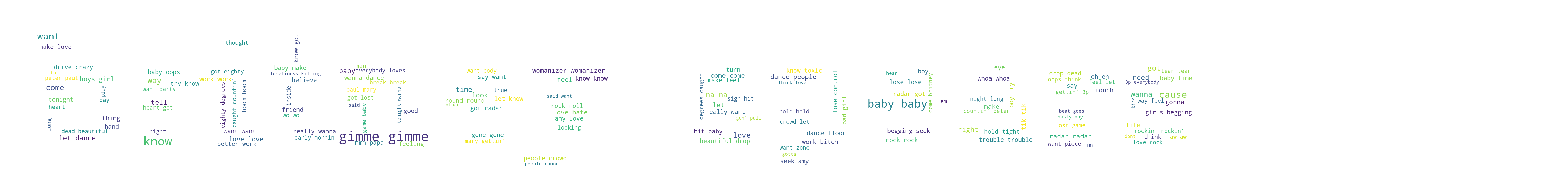

In [81]:
drawCloudArtist('britney spears')

In [71]:
# to see the possible artists
#D.keys()

# Taking a peak at the lyrics

In [74]:
data['lyrics'][1]

"playin' everything so easy, it's like you seem so sure. still your ways, you dont see i'm not sure if they're for me. then things come right along our way, though we didn't truly ask. it seems as if they're gonna linger with every delight they bring, just like what you have truly seemed. i'm trying to think of what you really want to say, even through my darkest day. you might want to leave me, feeling strange about you like you're gonna let me know, when words then slipped out of you. when words dont come so easy to say you just leave me feeling, come what may though i want things coming from your way. i say to you, you bore me all the time when you seem to hold back all in you, all that you want to let me know. why dont you have the courage? speak up and i'll listen, if you truly want me to know, then tell me. is there something wrong with you and you seem fastened there. it sounds as if there'll be a melody if things in you are let out and then i will feel alright. when you sleep, 

In [ ]:
"""
Notes:

The lyrics are poems, so \n can represent either a period or just a space.
"""
print ('')